# Lab Instructions

Create 3 visualizations from text data of your choice.  Each visualization should have at least 1 - 2 sentences explaining both the figure and the interpretation.
You may use any LLM and produce whatever visuals you think best illustrate your data.

In [66]:
import string
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words
additional_stopwords = {'really', 'feel', 'feeling', 'im', 'ive', 'thing', 'know', 'time', 'going', 'think', 'make', 'people', 's', 'm' }


In [67]:
df = pd.read_csv('Emotion_final.csv')

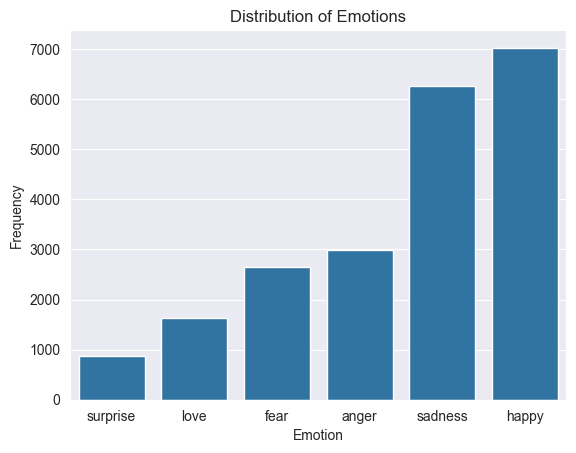

In [133]:
sdf = df.groupby(by='Emotion').count().sort_values(by='Text') # Good Lord this shouldn't have taken as long as it did to figure out.
ax = sns.barplot(data=sdf, x='Emotion', y='Text')
ax.set_title('Distribution of Emotions')
ax.set(ylabel='Frequency')
plt.show()

It seems that, at least in our sample, the two most frequent data (by far) were sadness and happy. This can be significant, if the data was randomly sampled, because it indicates that people are much more comfortable communicating happiness and sadness more than other emotions. I would have expected anger and surprise to be more frequent than they are personally, because I consider the internet to be an angry place, and because people love to play up their surprise on the internet (see: YouTube). This is worth considering also, because on the internet, people tend to bandwagon on the internet, meaning that the tone of messages on the internet are not necessarily independent of each other.

In [69]:
def generate_emotion_cloud(emotion, colormap):
	# Filter text samples for the emotion 'sadness'
	emotion_texts = " ".join(df[df['Emotion'] == emotion]['Text'].values)
	emotion_words = emotion_texts.lower().split()
	emotion_words = [word.strip(string.punctuation) for word in emotion_words if word.isalnum() and word not in sklearn_stop_words and word not in additional_stopwords]

	# Generate and display word cloud
	wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=colormap).generate(' '.join(emotion_words))


	#plt.figure(figsize=(10, 5))
	plt.imshow(wordcloud, interpolation='bilinear')
	plt.axis('off')
	plt.title(f'Word Cloud for Emotion: {emotion.title()}')
	plt.tight_layout()
	plt.show()

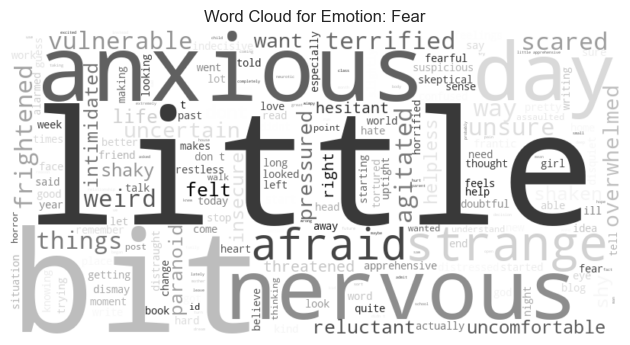

In [70]:
generate_emotion_cloud('fear', 'Greys')

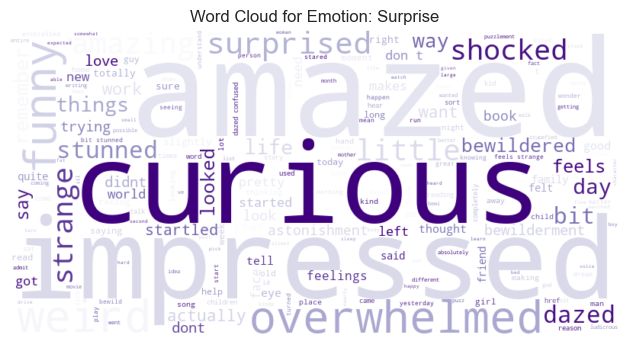

In [71]:
generate_emotion_cloud('surprise', 'Purples')

Between these two word clouds, we notice that most of these words are the same between them. Interestingly, we see that when the texts were fearful, they tried to diminish their feelings, the two biggest words being 'little', and 'bit', yet, in the Surprise wordcloud we see that they use more conversational words. Instead of anxious we see curious, instead of frightened, we see bewildered, instead of terrified, we see shocked. There is nuance in describing the same feeling but telling a different story.

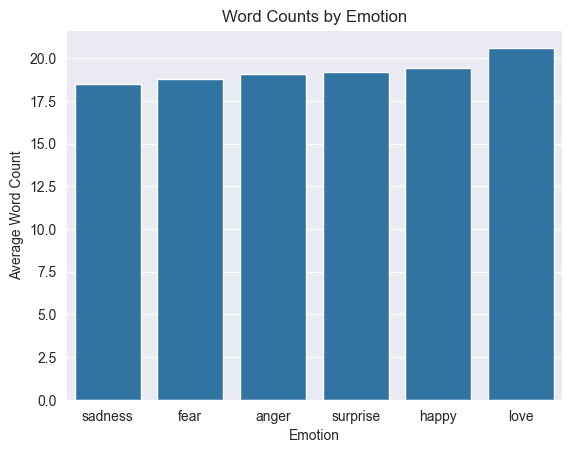

In [83]:
from operator import itemgetter

# This one is going to the average lengths of each type...
d = dict()
for e in df.Emotion.unique():
	sub = df[df['Emotion'] == e]
	sub_len = sub.count().iloc[0]
	len_sum = 0
	for i in range(0,sub_len):
		text = sub.iloc[i].iloc[0]
		len_sum = len_sum + len(text.split(' '))
	d.update({e : float(len_sum / sub_len)})
a =dict(sorted(d.items(), key=lambda item: item[1]))

ax = sns.barplot(data=a)
ax.set_title("Word Counts by Emotion")
ax.set(xlabel='Emotion', ylabel='Average Word Count')
plt.show()

We can see a general correlation in the word count and what we generally consider to be a positive emotion. While it's debatable which is worse between sadness and fear, most would generally agree that the negative emotions are on the left, and the positive ones are on the right. One might expect that a person who is angry would have much more to say than a person who was merely happy, but evidently, this is not always the case. It is an endearing thought that people have the most to say when they are feeling love.

While I may not have any particular narrative with this data, I find it interesting how people communicate different feelings differently. I was expecting people to have more negative things to say, I expected people to have more angry and surprised things to say. At every point in my exploration of this data, I was surprised that my initial assumptions were wrong. I never considered that people who were expressing their discomfort, especially online, would try to minimize their own feelings. It is scary to think that when we see and hear people vent, they are only expressing the smallest amount of their displeasure that they feel comfortable sharing. Moving forward, I will be looking out for people trying to minimize their own emotions since I am now aware of it.